**Import Libraries and Data**

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [81]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (3).csv


In [82]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=columns_to_drop)
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


**Check Whether The Target Variable is Binary or Ordinal​**

In [84]:
Target_values = df['Exited'].unique()

In [85]:
if len(Target_values) == 2:
    print("Binary Target Variable")
else:
    print("Ordinal Target Variable")

Binary Target Variable


**Target Description**

In [86]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

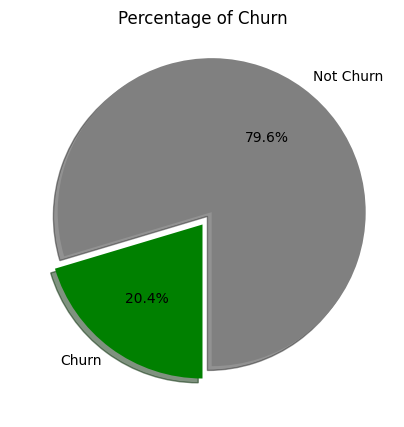

In [87]:
# Elemen Pie Chart
sizes = df['Exited'].value_counts(sort = True)
colors = ["grey","green"]
mpl.rcParams['figure.figsize'] = 5,5
labels = "Not Churn","Churn"
explode = (0.1,0)
# Pie Chart
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn')
plt.show()

**Identify Missing Value From Dataset​**



In [88]:
df_missing = df.isna().sum()
print(df_missing)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**Data Transform**

In [89]:
#variable list to create dummy variables
one_hot_ft = ["Geography"]
#generating dummy variable
df = pd.get_dummies(df, columns = one_hot_ft)

In [90]:
#generating dictionary for Male become 1, and Female become 0
gender_condition = [(df["Gender"]=="Male"),
                (df["Gender"] =="Female")]
gender = [1,0]
#mapping gender
df["gender"]=np.select(gender_condition,gender)
#drop Gender Variable
df = df.drop(columns=["Gender"])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,gender
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


**Check Whether Data is Sufficient or Not​**

In [91]:
num_samples = df.shape[0]

In [92]:
num_predictors = df.shape[1] - 1

In [93]:
class_distribution = df['Exited'].value_counts()

In [94]:
if num_samples < 10 * num_predictors:
    print("The number of samples is low. Consider collecting more data.")

if len(class_distribution) == 2 and min(class_distribution) / max(class_distribution) < 0.05:
    print("The dataset has a severe class imbalance. Consider addressing class imbalance techniques, such as resampling or using different evaluation metrics.")


In [95]:
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)





CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
gender               0
dtype: int64


**Check Whether Data is Imbalance or Not​**

In [96]:
class_distribution = df['Exited'].value_counts()

In [97]:
if len(class_distribution) == 2:
    # For binary classification
    positive_class_count = class_distribution[1]
    negative_class_count = class_distribution[0]

    if positive_class_count / negative_class_count < 0.05 or negative_class_count / positive_class_count < 0.05:
        print("The dataset has a severe class imbalance.")
    else:
        print("The dataset is not severely imbalanced.")
else:
    # For multi-class classification
    # You can inspect the class distribution or calculate imbalanced metrics
    # depending on your specific problem.
    print("Multi-class classification. Inspect the class distribution or use imbalanced metrics.")


The dataset is not severely imbalanced.


**Split Data into Training and Testing​**

In [98]:
#define independent columns and target (dependent) column
x_col = df.loc[:, df.columns != 'Exited']
y_col = df.loc[:, df.columns == 'Exited']
print(x_col)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1        101348.88                 1              

In [99]:
#Split dataset into train and test dataset
#using ratio 30% for test dataset and 70% for training dataset
x_train, x_test, y_train, y_test = train_test_split(x_col,
                                                    y_col,
                                                    test_size=0.3,
                                                    random_state=2)

In [100]:
from sklearn.linear_model import LogisticRegression

churn_model = LogisticRegression()
churn_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [101]:
pred = churn_model.predict(x_test)

**Deploy and Evaluating the Model​**

In [102]:
import sklearn.metrics as sm
accuracy = sm.accuracy_score(y_test, pred)
accuracy

0.7916666666666666

In [103]:
from sklearn.metrics import confusion_matrix as cm
conf = cm(y_test, pred)
df_confMatrix = pd.DataFrame(conf, columns=['predicted_not_churn','predicted_churn'], index = ['not_churn','churn'])
print(df_confMatrix)

           predicted_not_churn  predicted_churn
not_churn                 2346               69
churn                      556               29


In [104]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2415
           1       0.30      0.05      0.08       585

    accuracy                           0.79      3000
   macro avg       0.55      0.51      0.48      3000
weighted avg       0.71      0.79      0.73      3000



**Visualize Confusion Matrix using Heatmap​**

In [105]:
# Replace 'y_true' with your true labels and 'y_pred' with your predicted labels
conf_matrix = confusion_matrix(y_test, pred)

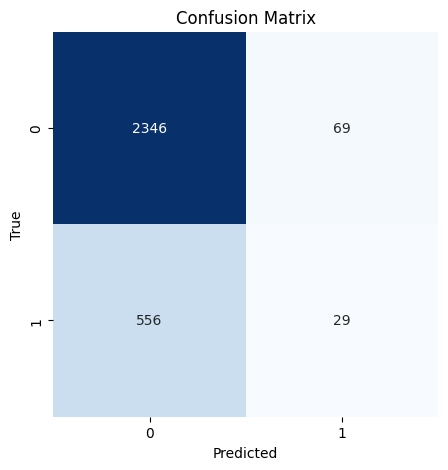

In [106]:
# Create a Seaborn heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Perform ROC Curve​**

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [108]:
# Get predicted probabilities for the positive class
y_probs = churn_model.predict_proba(x_test)[:, 1]

In [109]:
#Calculate the ROC curve and AUC (Area Under the Curve):

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

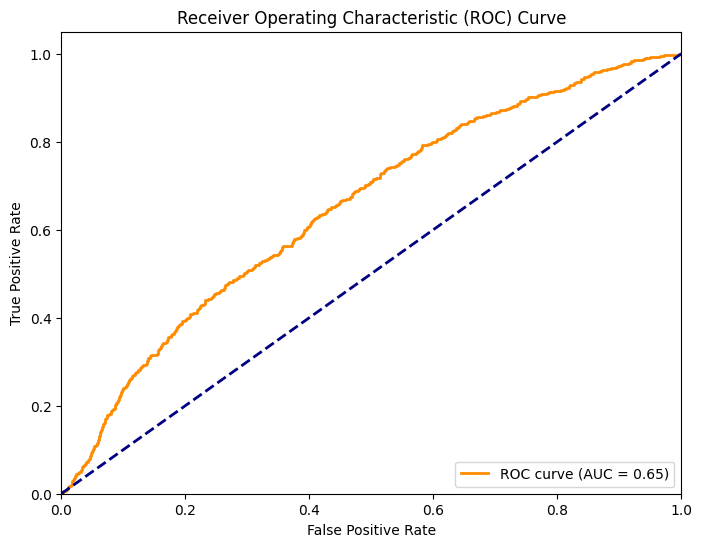

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
